In [2]:
import time

import torch
import numpy as np
import matplotlib.pyplot as plt

In [3]:
dataset = open('names.txt', 'r').read().splitlines()
print(f'The number of words is in our data set is: {len(dataset)}.')
smallest_word = str.upper(min(dataset, key=lambda word: len(word)))
largest_word = str.upper(max(dataset, key=lambda word: len(word)))
print(f'The smallest word is: {smallest_word}, its size is: {len(smallest_word)} ')
print(f'The largest word is: {largest_word} its size is: {len(largest_word)}')

The number of words is in our data set is: 32033.
The smallest word is: AN, its size is: 2 
The largest word is: MUHAMMADIBRAHIM its size is: 15


In [4]:
for word in dataset[:1]:
    print(word)
    for char1, char2 in zip(word, word[1:]):
        print(char1, char2)

emma
e m
m m
m a


In [5]:
bigram_count_map = {}
for word in dataset[:1]:
    letters = ['<S>'] + list(word) + ['<E>']
    for char1, char2 in zip(letters, letters[1:]):
        bigram = (char1, char2)
        bigram_count_map[bigram] = bigram_count_map.get(bigram, 0) + 1
        print(char1, char2)

<S> e
e m
m m
m a
a <E>


In [6]:
# Counts of all bigrams in the dataset ordered in a table / map
sorted(bigram_count_map.items(), key=lambda kv: kv[1], reverse=False)

[(('<S>', 'e'), 1),
 (('e', 'm'), 1),
 (('m', 'm'), 1),
 (('m', 'a'), 1),
 (('a', '<E>'), 1)]

In [7]:
######
# Now it's time to set up our binomial distribution chart. Let's look at the probabilities of any binomial pattern occurring.
#######

In [8]:
# prepare all probable choices into a lookup table
chars = sorted(list(set(''.join(dataset))))  # list of alphabet
chars

['a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'q',
 'r',
 's',
 't',
 'u',
 'v',
 'w',
 'x',
 'y',
 'z']

In [9]:
# Prepare a empty table to represent each binomial pattern that could happen/exist
N = torch.zeros((28, 28), dtype=torch.int32)
N

tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

In [10]:
char_to_index_lookup_table = {char: index for index, char in enumerate(chars)}

# Using <S>,<E> operands, add <S>,<E> to lookup table index
char_to_index_lookup_table['<S>'] = 26
char_to_index_lookup_table['<E>'] = 27

# update N-matrix of zeros to create lookup table
for word in dataset:
    letters = ['<S>'] + list(word) + ['<E>']
    for char1, char2 in zip(letters, letters[1:]):
        ix1 = char_to_index_lookup_table[char1]
        ix2 = char_to_index_lookup_table[char2]
        N[ix1, ix2] += 1

In [11]:
# Visualize the matrix of occurrences by count as 'some vector' or 'list of vectors'
N

tensor([[ 556,  541,  470, 1042,  692,  134,  168, 2332, 1650,  175,  568, 2528,
         1634, 5438,   63,   82,   60, 3264, 1118,  687,  381,  834,  161,  182,
         2050,  435,    0, 6640],
        [ 321,   38,    1,   65,  655,    0,    0,   41,  217,    1,    0,  103,
            0,    4,  105,    0,    0,  842,    8,    2,   45,    0,    0,    0,
           83,    0,    0,  114],
        [ 815,    0,   42,    1,  551,    0,    2,  664,  271,    3,  316,  116,
            0,    0,  380,    1,   11,   76,    5,   35,   35,    0,    0,    3,
          104,    4,    0,   97],
        [1303,    1,    3,  149, 1283,    5,   25,  118,  674,    9,    3,   60,
           30,   31,  378,    0,    1,  424,   29,    4,   92,   17,   23,    0,
          317,    1,    0,  516],
        [ 679,  121,  153,  384, 1271,   82,  125,  152,  818,   55,  178, 3248,
          769, 2675,  269,   83,   14, 1958,  861,  580,   69,  463,   50,  132,
         1070,  181,    0, 3983],
        [ 242,    0,

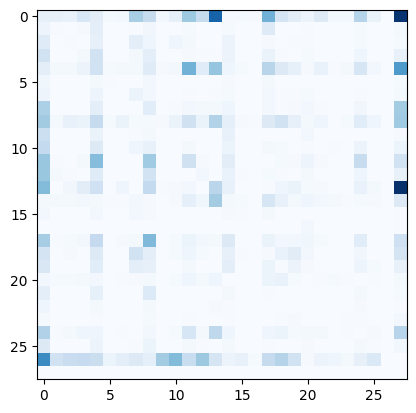

In [12]:
# Visualize the matrix of occurrences by count graphically (heatmap)
%matplotlib inline
plt.imshow(N, cmap='Blues')

(np.float64(-0.5), np.float64(27.5), np.float64(27.5), np.float64(-0.5))

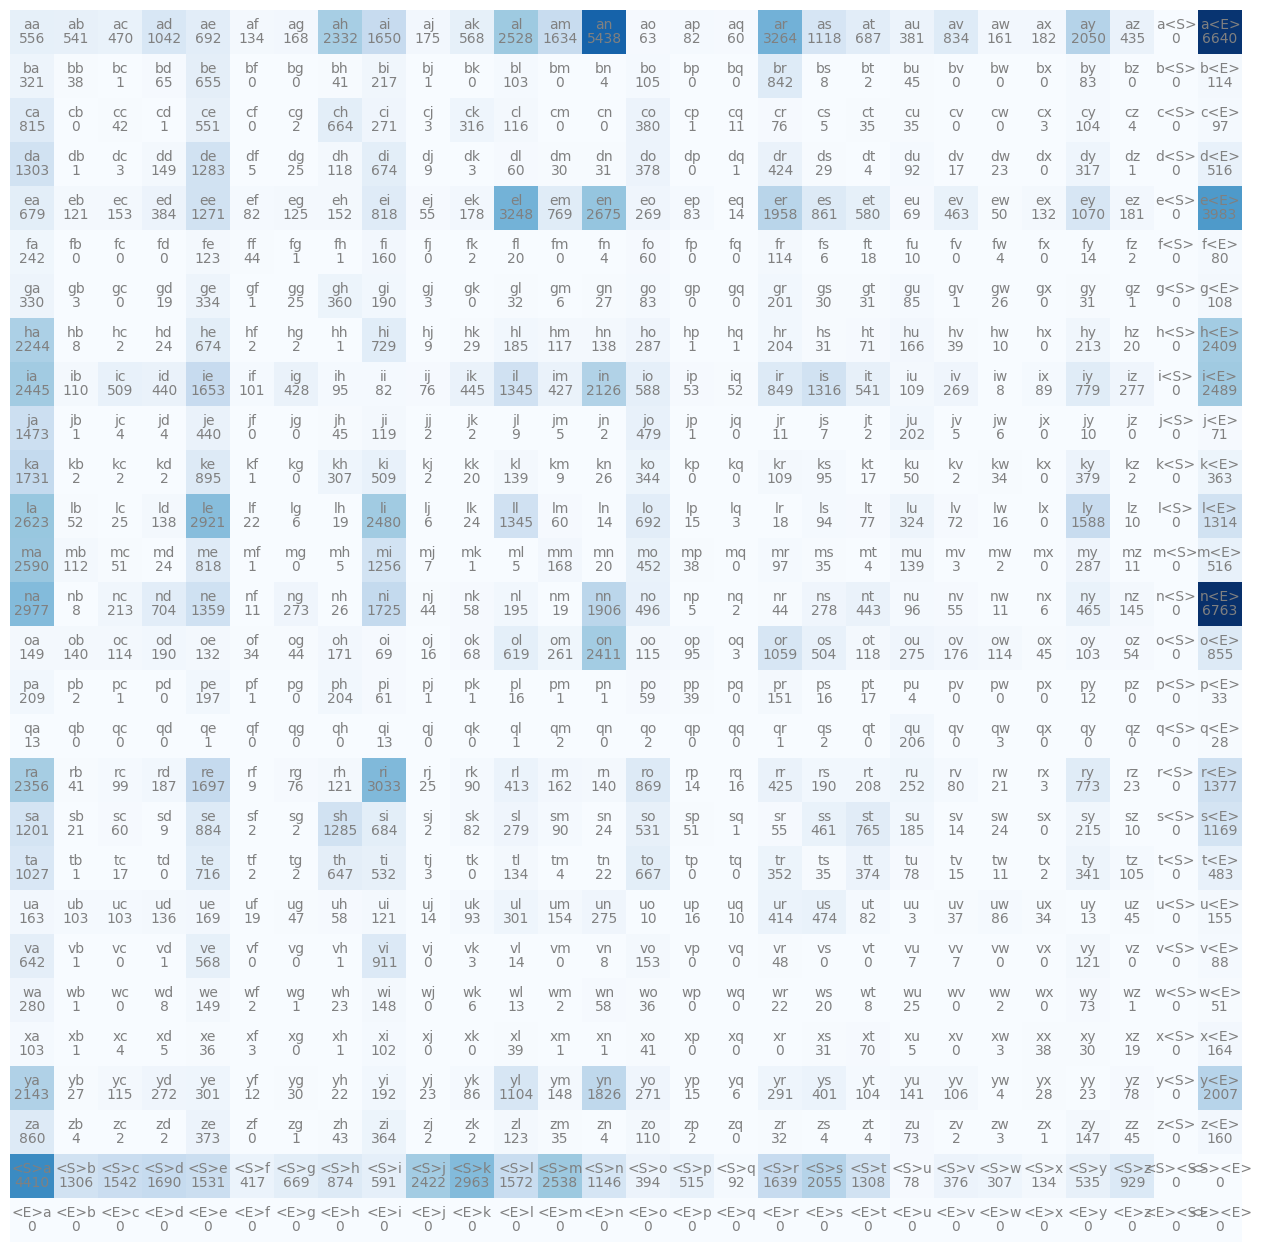

In [13]:
# More detailed graphical representation
%matplotlib inline
plt.figure(figsize=(16, 16))
plt.imshow(N, cmap='Blues')
index_to_char_lookup_table = {index: char for char, index in
                              char_to_index_lookup_table.items()}  # reverse char_to_index_lookup_table 
for i in range(28):  # realistically should be `for i in len(lookup_table.keys())`
    for j in range(28):  # realistically should be `for i in len(lookup_table.keys())`
        chstr = index_to_char_lookup_table[i] + index_to_char_lookup_table[j]
        # matrix is an array of arrays so to get the value at i,j we need .item()
        plt.text(j, i, chstr, ha="center", va="bottom", color="gray")
        plt.text(j, i, N[i, j].item(), ha="center", va="top", color="gray")
plt.axis('off')

# plt.imshow(char_to_count_matrix)

In [14]:
# Notice a<S>,b<S>,...z<S> nor <E>a,<E>b,...<E>z will never happen. 
# It is impossible to have a letter before the start <S> of word/sentence. 
# It is impossible to have a letter after the end <E> of a word/sentence.

# So let's optimize our visualizations... We will replace <S>,<E> with <.> period and update or lookup_table to have 27 dimensions not 28.
N = torch.zeros((27, 27), dtype=torch.int32)
N

# Using <.> operator, add <.> to lookup table index, add one to offset 0 and not overwrite the (k,v) for <.>
char_to_index_lookup_table = {char: index + 1 for index, char in enumerate(chars)}
char_to_index_lookup_table['.'] = 0

# update N-matrix of zeros to create lookup table
for word in dataset:
    chs = ['.'] + list(word) + ['.']
    for char1, char2 in zip(chs, chs[1:]):
        ix1 = char_to_index_lookup_table[char1]
        ix2 = char_to_index_lookup_table[char2]
        N[ix1, ix2] += 1

In [15]:
# Matrix representation of bigram dataset with <.> in place of <S>,<E>
N

tensor([[   0, 4410, 1306, 1542, 1690, 1531,  417,  669,  874,  591, 2422, 2963,
         1572, 2538, 1146,  394,  515,   92, 1639, 2055, 1308,   78,  376,  307,
          134,  535,  929],
        [6640,  556,  541,  470, 1042,  692,  134,  168, 2332, 1650,  175,  568,
         2528, 1634, 5438,   63,   82,   60, 3264, 1118,  687,  381,  834,  161,
          182, 2050,  435],
        [ 114,  321,   38,    1,   65,  655,    0,    0,   41,  217,    1,    0,
          103,    0,    4,  105,    0,    0,  842,    8,    2,   45,    0,    0,
            0,   83,    0],
        [  97,  815,    0,   42,    1,  551,    0,    2,  664,  271,    3,  316,
          116,    0,    0,  380,    1,   11,   76,    5,   35,   35,    0,    0,
            3,  104,    4],
        [ 516, 1303,    1,    3,  149, 1283,    5,   25,  118,  674,    9,    3,
           60,   30,   31,  378,    0,    1,  424,   29,    4,   92,   17,   23,
            0,  317,    1],
        [3983,  679,  121,  153,  384, 1271,   82,

(np.float64(-0.5), np.float64(26.5), np.float64(26.5), np.float64(-0.5))

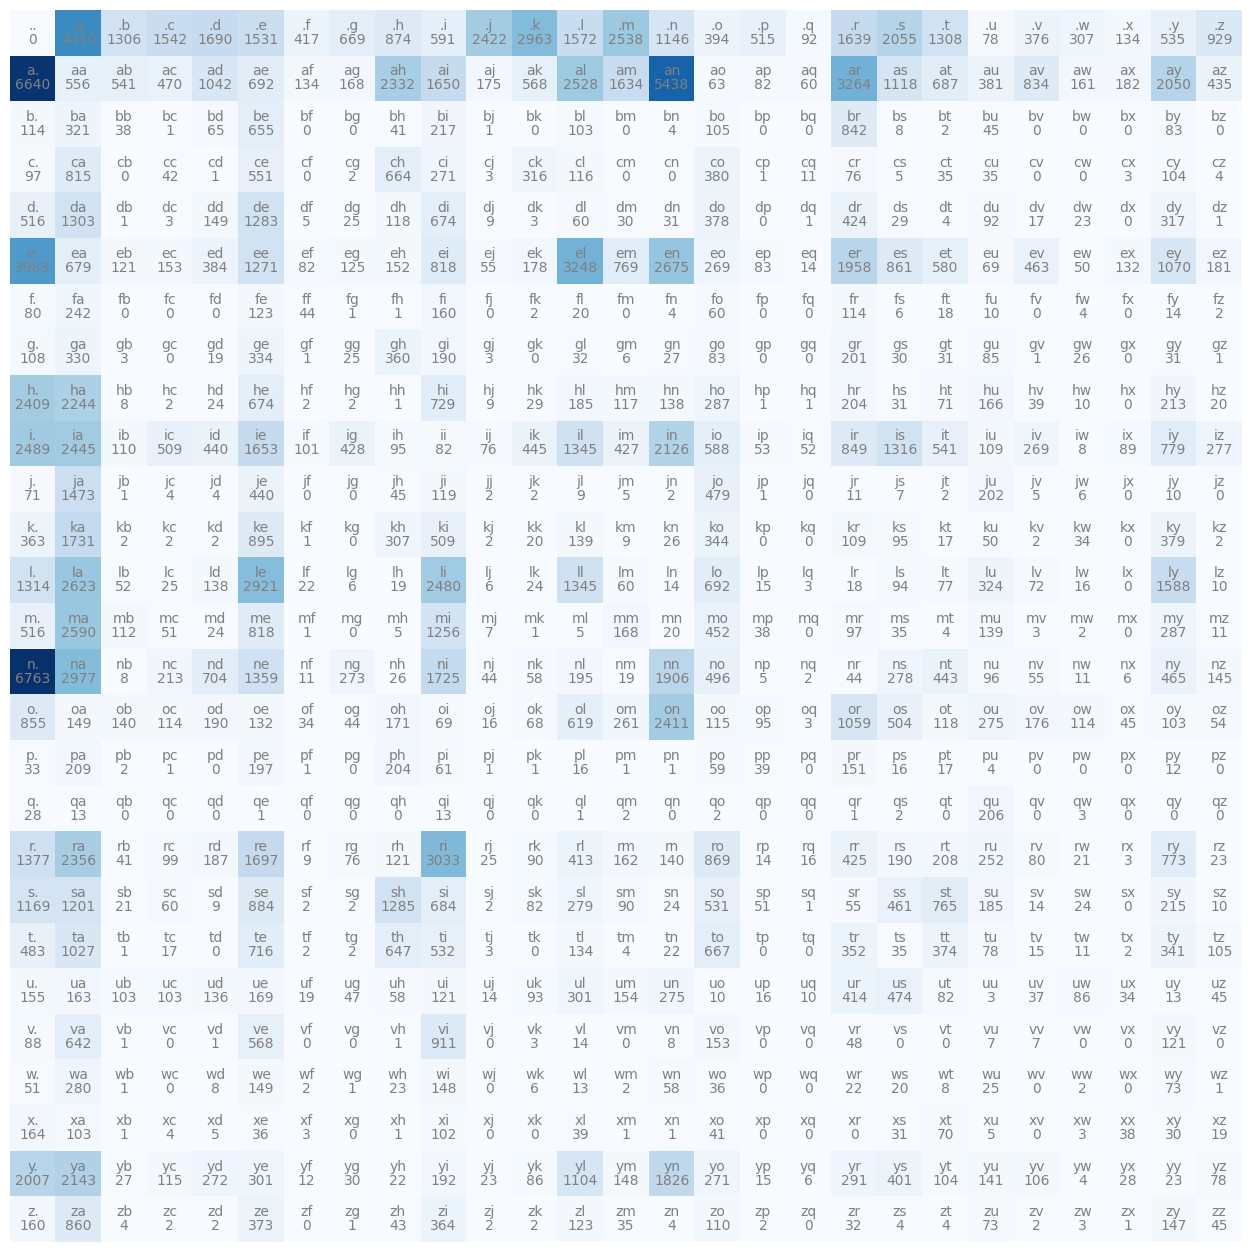

In [16]:
%matplotlib inline
plt.figure(figsize=(16, 16))
plt.imshow(N, cmap='Blues')
index_to_char_lookup_table = {index: char for char, index in
                              char_to_index_lookup_table.items()}  # reverse char_to_index_lookup_table 
for i in range(27):  # realistically should be `for i in len(lookup_table.keys())`
    for j in range(27):  # realistically should be `for i in len(lookup_table.keys())`
        chstr = index_to_char_lookup_table[i] + index_to_char_lookup_table[j]
        # matrix is an array of arrays so to get the value at i,j we need .item()
        plt.text(j, i, chstr, ha="center", va="bottom", color="gray")
        plt.text(j, i, N[i, j].item(), ha="center", va="top", color="gray")
plt.axis('off')

In [17]:
# Manual implementation of the ML algorithm - drawing based on probability of occurrence in the dataset

# inefficient, repeated computation of probability matrix, not scalable because matrix will grow too large
def bigram_algorithm_inefficient(seed_generator, lookup_table, prob_matrix):
    ix = 0
    out = []
    while True:
        probability = prob_matrix[ix].float()
        probability = probability / probability.sum()
        ix = torch.multinomial(probability, num_samples=1, replacement=True, generator=seed_generator).item()
        out.append(lookup_table[ix])
        if ix == 0:
            break
    return ''.join(out)


# efficient without extra computational overhead, only one computation of probability matrix, not scalable because matrix will grow to large
# can get a bad draw if lookup_table does not have occurrence or prob_matrix has a 0
def bigram_algorithm_efficient(seed_generator, lookup_table, prob_matrix):
    # reduce computational overhead by having probability matrix upfront
    # do element-wise matrix division using torch broadcasting (27,27) / (27,1) is expanded to (27,27) / (27,27)
    # https://pytorch.org/docs/stable/notes/broadcasting.html
    P = prob_matrix.float()
    # 0 = sum across cols, 1 = sum across rows, and use /= over P = P/P.sum() to reduce space complexity
    P /= P.sum(1, keepdim=True)

    ix = 0
    out = []
    while True:
        probability = P[ix]
        ix = torch.multinomial(probability, num_samples=1, replacement=True, generator=seed_generator).item()
        out.append(lookup_table[ix])
        if ix == 0:
            break
    return ''.join(out)


# to avoid 'bad draw' we will smooth by adding a 'h' to the prob matrix P[]+1
def bigram_algorithm_efficient_w_manual_smoothing(seed_generator, lookup_table, prob_matrix, smoothing_amount):
    # reduce computational overhead by having probability matrix upfront
    # do element-wise matrix division using torch broadcasting (27,27) / (27,1) is expanded to (27,27) / (27,27)
    # https://pytorch.org/docs/stable/notes/broadcasting.html

    P = (prob_matrix + smoothing_amount).float()
    # 0 = sum across cols, 1 = sum across rows, and use /= over P = P/P.sum() to reduce space complexity
    P /= P.sum(1, keepdim=True)

    ix = 0
    out = []
    while True:
        probability = P[ix]
        ix = torch.multinomial(probability, num_samples=1, replacement=True, generator=seed_generator).item()
        out.append(lookup_table[ix])
        if ix == 0:
            break
    return ''.join(out)


def nueral_net_algorithm(seed_generator, num_of_obj_classes, W, lookup_table):
    out = []
    ix = 0
    while True:
        # forward pass
        xenc = torch.nn.functional.one_hot(torch.tensor([ix]), num_classes=num_of_obj_classes).float()
        # used to predict log counts , why does tensor multiplication automatically return log count?
        logits = xenc @ W
        # manual softmax function (make nueral net from probs),  e^z_i / from j->k sum(e^z_j) aka 'normalization function'
        counts = logits.exp()  # equivalent to N matrix in counting bigram or P matrix in normalized matrix of probabilities based on count
        p = counts / counts.sum(1, keepdims=True)  # 1 doesn't work, but -1 does? why? 
        ix = torch.multinomial(p, num_samples=1, replacement=True, generator=seed_generator).item()
        out.append(lookup_table[ix])
        if ix == 0:
            break
    return ''.join(out)

    # Used for training
    # # probs = counts / counts.sum(1, keepdim=True)  # normalize counts matrix to get P[]
    # # probs[torch.arange(5),all_y]
    # loss = -probs[torch.arange(5),all_y].log().mean()
    # print(loss)
    # 
    # #backward propagation
    # W_2D.grad = None
    # loss.backward()
    # W_2D.grad
    # 
    # # update gradient vector to decrease loss for W (nueral net's weight matrix) at ith position for each neuron
    # W_2D.data+= -0.1*W_2D.grad



In [18]:
# TEST THE MODEL

# Create a generator for deterministic results
my_torch_generator = torch.Generator().manual_seed(2147483647)

# Sampling
for i in range(1):
    print(
        f'The manual implementation of inefficient bigram approach:',
        bigram_algorithm_inefficient(
            my_torch_generator,
            index_to_char_lookup_table,
            N
        )
    )

    print(
        f'The more efficient implementation of inefficient Bigram approach:',
        bigram_algorithm_efficient(
            my_torch_generator,
            index_to_char_lookup_table,
            N
        )
    )

    W = torch.randn((27, 27), generator=my_torch_generator, requires_grad=True)

    print(
        f'The simple nueral net implementation',
        bigram_algorithm_efficient_w_manual_smoothing(
            my_torch_generator,
            index_to_char_lookup_table,
            W,
            5
        )
    )

    print(
        f'The simple nueral net implementation with manual loss function',
        nueral_net_algorithm(
            my_torch_generator,
            27,
            W,
            index_to_char_lookup_table
        )
    )

The manual implementation of inefficient bigram approach: cexze.
The more efficient implementation of inefficient Bigram approach: momasurailezitynn.
The simple nueral net implementation olg.
The simple nueral net implementation with manual loss function rpsg.


In [21]:
# Goal, minimize nll w.r.t model parameters or statistical model approach
# because we are interested in probability of ch1,ch2,..ch_n, we are essentially interested in the prob(a)*prob(b)*prob(c)
# we dont want tiny numbers, so we will take log(prob) = log(ch1)*log(ch2)*...*log(ch_n)

# P = N.float()
# smooth model to avoid cases where selection does not have a frequency in matrix (set/list of all probable choices)
P = (N + 1).float()
P /= P.sum(1, keepdim=True)
n = 0
log_liklihood = 0.0

for word in dataset[:5]:
    # for word in ["montanizqw"]: # Q: bug if word not wrapped in list, why?; A: zip function behaves unexpected.
    n=0
    log_liklihood = 0.0
    chs = ['.'] + list(word) + ['.']
    for char1, char2 in zip(chs, chs[1:]):
        ix1 = char_to_index_lookup_table[char1]
        ix2 = char_to_index_lookup_table[char2]
        prob = P[ix1, ix2]
        logprob = torch.log(prob)
        log_liklihood += logprob
        n += 1
        print(f"{char1, char2}: {prob:.4f} {logprob:.4f} {-log_liklihood:.4f} {n}")
print(f'{log_liklihood=}')

nll = -log_liklihood
print(f'{nll=}')

normalized_nll = nll / n
print(f'{normalized_nll=}')

('.', 'e'): 0.0478 -3.0410 3.0410 1
('e', 'm'): 0.0377 -3.2793 6.3204 2
('m', 'm'): 0.0253 -3.6753 9.9957 3
('m', 'a'): 0.3885 -0.9454 10.9411 4
('a', '.'): 0.1958 -1.6305 12.5716 5
('.', 'o'): 0.0123 -4.3965 4.3965 1
('o', 'l'): 0.0779 -2.5526 6.9491 2
('l', 'i'): 0.1774 -1.7293 8.6784 3
('i', 'v'): 0.0152 -4.1845 12.8629 4
('v', 'i'): 0.3508 -1.0476 13.9105 5
('i', 'a'): 0.1380 -1.9807 15.8912 6
('a', '.'): 0.1958 -1.6305 17.5217 7
('.', 'a'): 0.1376 -1.9835 1.9835 1
('a', 'v'): 0.0246 -3.7041 5.6876 2
('v', 'a'): 0.2473 -1.3971 7.0847 3
('a', '.'): 0.1958 -1.6305 8.7152 4
('.', 'i'): 0.0185 -3.9919 3.9919 1
('i', 's'): 0.0743 -2.5998 6.5916 2
('s', 'a'): 0.1478 -1.9119 8.5036 3
('a', 'b'): 0.0160 -4.1363 12.6398 4
('b', 'e'): 0.2455 -1.4044 14.0443 5
('e', 'l'): 0.1589 -1.8396 15.8839 6
('l', 'l'): 0.0962 -2.3408 18.2248 7
('l', 'a'): 0.1876 -1.6733 19.8980 8
('a', '.'): 0.1958 -1.6305 21.5285 9
('.', 's'): 0.0641 -2.7468 2.7468 1
('s', 'o'): 0.0654 -2.7270 5.4739 2
('o', 'p'): 0.01

In [22]:
# Neural net

# create training set of bigrams
all_x, all_y = [], []

for word in dataset[:1]:
    # for word in ["montanizqw"]: # Q: bug if word not wrapped in list, why?; A: zip function behaves unexpected.
    chs = ['.'] + list(word) + ['.']
    for char1, char2 in zip(chs, chs[1:]):
        ix1 = char_to_index_lookup_table[char1]
        ix2 = char_to_index_lookup_table[char2]
        print(char1, char2)
        all_x.append(ix1)
        all_y.append(ix2)

all_x = torch.tensor(all_x)
all_y = torch.tensor(all_y)
print(f"{all_x=}")
print(f"{all_y=}")

# Using OneHotEncoding, create vector of 0s with the desired bit turned on. In other words turn integer into vector. 
# We are passing in the index of the char we expect the nueral net to operate with
xenc = torch.nn.functional.one_hot(all_x,
                                   num_classes=27).float()  # use floats because nueral net handles better. why not use integers?
# xenc.shape
# plt.imshow(xenc)


# get fire rate of n x m, or fire rate of output given input, or fire rate of m given n
W_1D = torch.randn((27, 1))  # 1 neuron, single layer w/ 1 neuron
W_2D = torch.randn(27, 27)  # 27 neurons, single layer w/ 2 neurons

# a @ b == a[:] * b[:], matrix multiplication
# print(f"{(xenc @ W_1D)=}")
print((xenc @ W_1D).shape)
# print(f"{(xenc @ W_2D)=}")
print((xenc @ W_2D).shape)
# what are the dangers of a single neuron of 27 neurons? is learning stunted


# add letters to plot for better visual understanding
# plt.imshow(xenc @ W_1D)
# plt.imshow(xenc @ W_2D)

. e
e m
m m
m a
a .
all_x=tensor([ 0,  5, 13, 13,  1])
all_y=tensor([ 5, 13, 13,  1,  0])
torch.Size([5, 1])
torch.Size([5, 27])


In [533]:
# all operations are differentiable which helps back propagation
logits = (xenc @ W_2D)  # why does tensor multiplication automatically return log count?
counts = (xenc @ W_2D).exp()  # equivalent to N
probs = counts / counts.sum(1, keepdim=True)  # normalize counts matrix to get P[]

In [534]:
nlls = torch.zeros(5)
for i in range(len(nlls)):
    x = all_x[i].item()
    y = all_y[i].item()
    print('------------------')
    print(f'bigram example {i + 1}: {index_to_char_lookup_table[x]}{index_to_char_lookup_table[y]} (indexes {x},{y})')
    print(f"input to the neural net:", x)
    print(f"output probabilities from neural net", probs[i])
    print(f"label (actual next character):", y)
    p = probs[i, y]
    print(f"probability assigned by neural net to next correct char:", p.item())
    logp = torch.log(p)
    print(f"logp = {logp.item()}")
    nll = -logp
    print(f"nll = {nll}")
    nlls[i] = nll

print('============')
print('average nll, i.e loss is ', nlls.mean().item())

------------------
bigram example 1: .e (indexes 0,5)
input to the neural net: 0
output probabilities from nueral net tensor([0.0269, 0.0500, 0.0330, 0.0484, 0.0129, 0.0274, 0.0086, 0.1441, 0.0204,
        0.0464, 0.0071, 0.0337, 0.0348, 0.0089, 0.0421, 0.0188, 0.0063, 0.0255,
        0.0163, 0.0107, 0.0075, 0.0318, 0.0153, 0.0240, 0.0734, 0.1555, 0.0702])
label (actual next character): 5
probability assigned by nueral net to next correct char: 0.027410533279180527
logp = -3.596827983856201
nll = 3.596827983856201
------------------
bigram example 2: em (indexes 5,13)
input to the neural net: 5
output probabilities from nueral net tensor([0.0134, 0.0338, 0.0739, 0.0062, 0.0462, 0.0344, 0.0576, 0.0026, 0.0409,
        0.0514, 0.0491, 0.0303, 0.0248, 0.0157, 0.0984, 0.0185, 0.1809, 0.0218,
        0.0056, 0.0143, 0.0301, 0.0080, 0.0497, 0.0140, 0.0093, 0.0171, 0.0519])
label (actual next character): 13
probability assigned by nueral net to next correct char: 0.015677858144044876
logp = -

In [563]:
# regularization loss incentivizes W to be 0, yes, this leads to uniformity
W_2D = torch.randn((27, 27), generator=my_torch_generator, requires_grad=True)

for k in range(10):  # see 10 gradient descents

    # forward pass
    xenc = torch.nn.functional.one_hot(all_x, num_classes=27).float()
    logits = (xenc @ W_2D)  # why does tensor multiplication automatically return log count?
    counts = (xenc @ W_2D).exp()  # equivalent to N
    probs = counts / counts.sum(1, keepdim=True)  # normalize counts matrix to get P[]
    probs[torch.arange(5), all_y]  # probs[0,5], probs[1,13],probs[2,13], probs[3,5],probs[4,0]
    loss = -probs[torch.arange(5), all_y].log().mean() + 0.01 * (
            W_2D ** 2).mean()  #binds weights to 0, its coefficient will determine uniformity
    print(loss)

    #backward propagation
    W_2D.grad = None
    loss.backward()
    W_2D.grad

    # update gradient vector to decrease loss for W (neural net's weight matrix) at ith position for each neuron
    W_2D.data += -.9 * W_2D.grad

tensor(3.2247, grad_fn=<AddBackward0>)
tensor(3.0514, grad_fn=<AddBackward0>)
tensor(2.8821, grad_fn=<AddBackward0>)
tensor(2.7176, grad_fn=<AddBackward0>)
tensor(2.5583, grad_fn=<AddBackward0>)
tensor(2.4047, grad_fn=<AddBackward0>)
tensor(2.2575, grad_fn=<AddBackward0>)
tensor(2.1170, grad_fn=<AddBackward0>)
tensor(1.9837, grad_fn=<AddBackward0>)
tensor(1.8579, grad_fn=<AddBackward0>)
